In [1]:
from project.algorithms import ESMuPLambda

n = 31
y, x = 10, 30
max_trials, precision = 10000, 0.0001
mu, lam = 10, 100
search_space = (-10, y)

sim = ESMuPLambda(search_space, n, y, x, max_trials, precision, mu, lam)
sim.run()

print("Algorithm finished:")
print("\tGenerations:", sim.generations)
print("\tFitness:", sim.results[-1][0])


Algorithm finished:
	Generations: 276
	Fitness: 7.292322315345288


In [2]:
import matplotlib.pyplot as plt
import numpy as np


def create_fitness_gif(output_dir, frames=100):
    fig, ax = plt.subplots()
    step_size = int(sim.generations / frames)
    rem = sim.generations % frames
    data_points = step_size
    c = 1
    digits = int(np.log10(frames)) + 1

    while data_points < sim.generations + rem:
        ax.clear()
        ax.set_xlabel('Generations')
        ax.set_ylabel('Fitness')
        population = sim.results[:data_points]
        X = list(range(1, data_points + 1))
        Y_mean = [r[0] for r in population]
        Y_best = [r[1][0].fitness for r in population]
        ax.plot(Y_mean, label='mean', color='lightcoral')
        ax.plot(Y_best, label='best', color='darkcyan')
        ax.legend()
        ax.text(0.6*data_points, 0.6*max(Y_best), 'best: {:.4f}'.format(Y_best[-1]))
        ax.text(0.6*data_points, 0.6*max(Y_best) + 3, 'mean: {:.4f}'.format(Y_mean[-1]))
        plt.savefig('{}/{}.frame.jpg'.format(output_dir, str(c).zfill(digits)))
        data_points += step_size
        c += 1

create_fitness_gif('output/mean', frames=100)

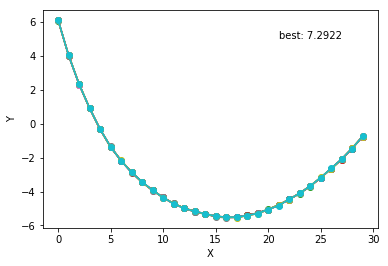

In [3]:
import matplotlib.pyplot as plt
import math


def create_population_gif(output_dir, frames=100):
    fig, ax = plt.subplots()
    digits = int(math.log10(len(sim.results))) + 1
    c = 1
    for g in [r[1] for r in sim.results]:
        ax.clear()
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        for curve in g:
            ax.plot(curve.chromosome, marker='o')
        ax.text(sim.x * 0.7, sim.y * 0.5, 'best: {:.4f}'.format(g[0].fitness))
        plt.savefig('{}/{}.frame.jpg'.format(output_dir, str(c).zfill(digits)))
        c += 1
            
create_population_gif('output/curves', )